#회기 분석

##단순회기

In [1]:
# 필요한 딕셔너리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #다양한 그래프 모듈이 있음
# 데이터프레임 객체 생성
df = pd.read_csv("/content/auto-mpg.csv", header=None)
df.columns =  ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

In [2]:
# 데이터 프레임 객체의 모습과 정보를 확인
print(df.head())
print()
print(df.info())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2

In [3]:
# pandas .set_option(pat,value) 함수
pd.set_option("display.max_columns",10) #display 할 최대 컬럼수 =10
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [4]:
# 데이터 동계 요약 정보 확인
print(df.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [7]:
# 통계 요약 정보에 horsepower가 빠져 있는 이유를 확인
# 데이터프레임에서 horsepower 컬럼의 고유값 확인
print(df["horsepower"].unique())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


In [8]:
# horsepower컬럼에 있는 ?를 np.nan으로 변경하고 변경데이터 저장
df["horsepower"].replace("?",np.nan, inplace = True)
# 데이터프레임.dropna(subset=[컬럼명], axis=0(행)) : np.nan 가 있는 행 제거
df.dropna(subset=["horsepower"], axis=0, inplace=True)
# object로 저장 되있던 고유값을 float으로 변경
df["horsepower"] = df["horsepower"].astype("float")
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [9]:
ndf = df[["mpg","cylinders","horsepower","weight"]] #데이터 프레임에서 이 4가지 컬럼만 가져오기
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


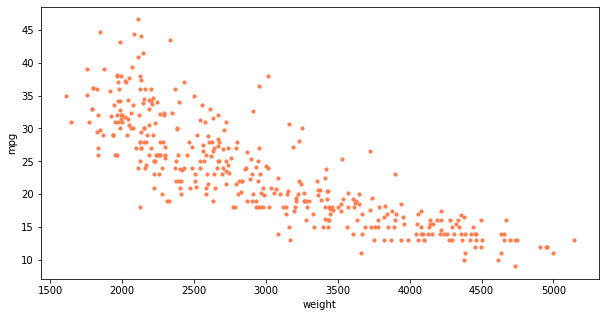

In [10]:
# matplotlib의 plot이 아니라 pandas 의 plot을 사용
ndf.plot(kind="scatter", x="weight", y="mpg", c="coral", s=10, figsize=(10,5))
# plt.scatter(ndf["weight"],ndf["mpg"],color = "coral")

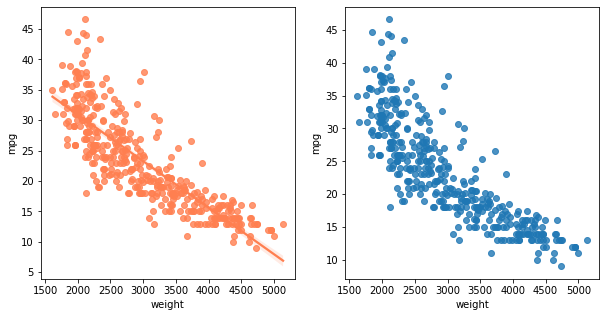

In [11]:
# 한종이에 두가지 그래프 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# seaborn 라이브러리의 regplot(scatter에 회귀선까지 있음) 그리기
sns.regplot(x="weight", y="mpg", data = ndf, ax=ax1,color="coral")
sns.regplot(x="weight", y="mpg", data = ndf, ax=ax2,fit_reg=False)

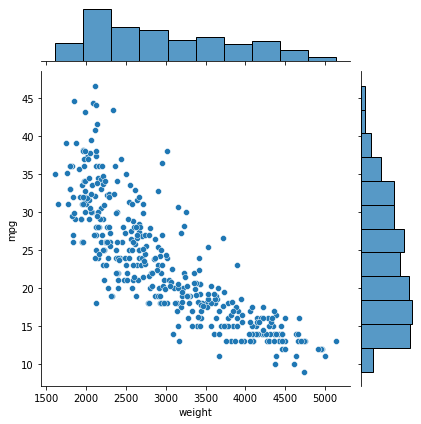

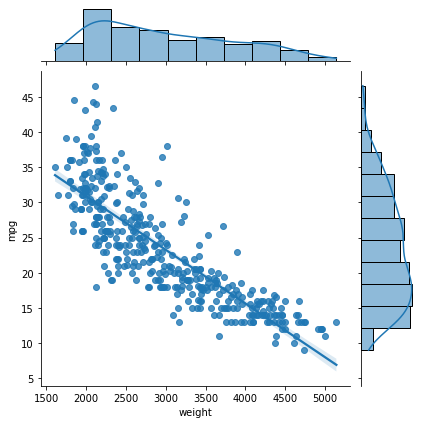

In [12]:
# seaborn 라이브러리의 jointplot(scatter & histogram) 그리기
sns.jointplot(x="weight", y="mpg", data=ndf)
sns.jointplot(x="weight", y="mpg", kind="reg", data=ndf)

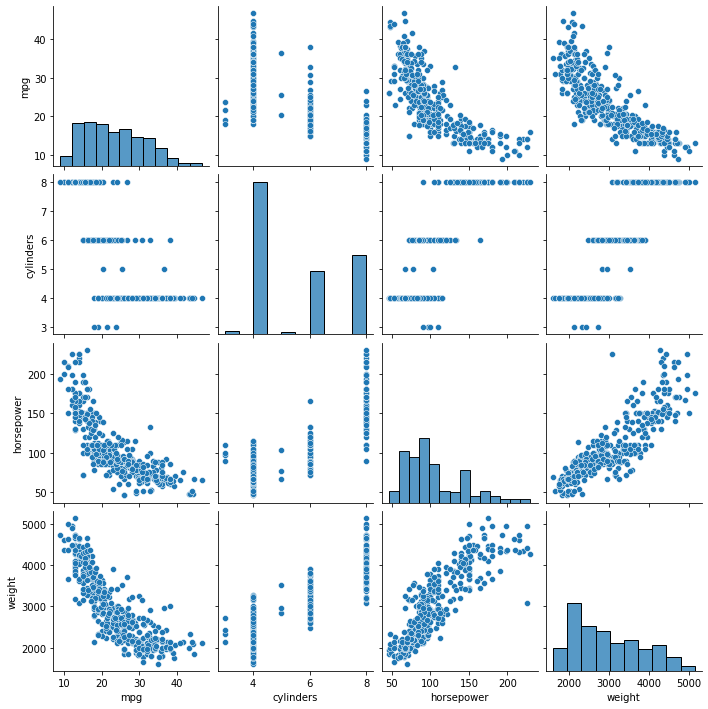

In [13]:
# pairplot() : 모든 특성 사이의 그래프를 그리기
grid_ndf = sns.pairplot(ndf)

In [14]:
X = ndf[["weight"]] #input데이터는 2차원으로 입력
y = ndf["mpg"]
# 데이터를 훈련데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print("train data 개수: ", len(X_train))
print("test data 개수: ", len(X_test))


train data 개수:  274
test data 개수:  118


In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 선형회기 학습 : 무게로 연비 예측하기
lr.fit(X_train, y_train)
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299322


In [16]:
# 모델파라미터 구하기
print(lr.coef_, lr.intercept_)

[-0.00775343] 46.7103662572801


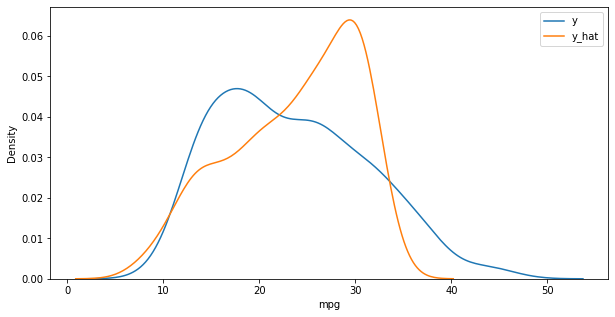

In [20]:
y_hat = lr.predict(X)
# 구한 모델파라미터를 이용하여 연비를 예측 -> y_hat
plt.figure(figsize=(10,5))
# 원래 데이터값 y
ax1 = sns.kdeplot(y, label="y")
# 예측한 데이터값 y_hat
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()

In [18]:
print(y_hat)

[19.54234168 18.0769431  20.06957503 20.09283533 19.96878042 13.05271937
 12.95192476 13.27756889 12.40143111 16.85965432 19.08488921 18.72823136
 17.54970974 22.78327612 28.31922633 24.74489433 25.2023468  26.65223852
 30.1955568  32.48281914 25.99319683 27.8695273  28.29596604 29.3891999
 26.17927919 10.92827909 12.78134926 12.73482867 10.02112759 30.1955568
 29.15659695 29.43572049 26.28782724 20.04631474 20.89919222 21.10853488
 21.21708292 14.07617235 12.09904728 14.50261109 14.95231013  8.29211233
  9.91257955  6.85772747 23.74470165 28.04010279 21.26360351 22.37234424
 29.49774795 30.24983082 30.62974897 30.69952986 32.9635319  34.20408097
 32.49057257 31.55240734 29.04804891 30.22657052 29.23413127 28.04010279
 29.45122736 13.57219929 12.71156838 14.6499263  14.69644689 18.23976516
 10.78871732 11.80441687 12.16107473 12.42469141 28.64487046 16.53401019
 14.93680327 13.41713066 15.09962533 23.96955117 27.24149933 23.61289331
 29.73810433 28.1408974  28.97051459 27.28026649 29.9

##다항회기

In [21]:
print(X_train.shape, X_test.shape)

(274, 1) (118, 1)


In [22]:
# 특성공학
from sklearn.preprocessing import PolynomialFeatures

In [23]:
# 객체지정
poly = PolynomialFeatures(degree=2)
# 추정과 변환을 동시에
X_train_poly = poly.fit_transform(X_train)
print(X_train.shape)
print(X_train_poly.shape)

(274, 1)
(274, 3)


In [24]:
# 트레인 데이터에서 늘어난 특성과 y값 선형회귀 
pr = LinearRegression()
pr.fit(X_train_poly, y_train)
# 테스트 데이터도 특성늘려주기
X_test_poly = poly.fit_transform(X_test)
# 테스트 데이터의 정확도 구하기
r_square = pr.score(X_test_poly, y_test)
print(r_square)
# 별 차이 없음

0.7087009262975481


Text(0, 0.5, 'mpg')

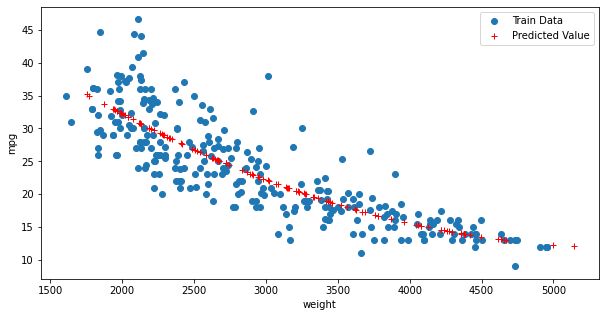

In [25]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, "o", label="Train Data")
ax.plot(X_test, y_hat_test, "r+", label="Predicted Value")
ax.legend(loc="best") #loc매개변수 : (= "best" 일때) 최적의 장소를 찾앚줌
plt.xlabel("weight")
plt.ylabel("mpg")

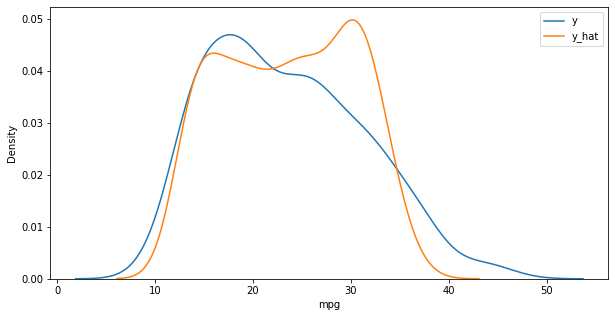

In [26]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y,label="y")
ax2 = sns.kdeplot(y_hat,label="y_hat",ax=ax1)
plt.legend()


##다중회기

In [27]:
X=ndf[["cylinders","horsepower","weight"]]
y=ndf["mpg"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=10)

print(X_train.shape, X_test.shape)

(274, 3) (118, 3)


In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
r_square = lr.score(X_test, y_test)
print(r_square)
print(lr.coef_, lr.intercept_)

0.6939048496695599
[-0.60691288 -0.03714088 -0.00522268] 46.414351269634025


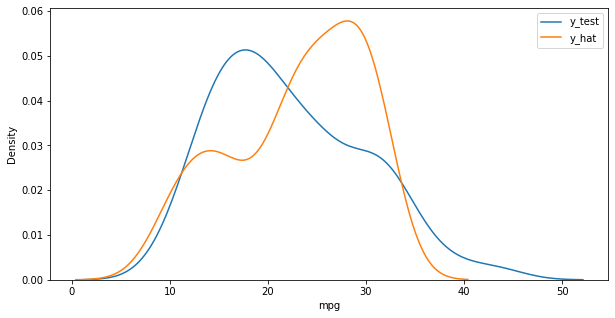

In [29]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test, label="y_test") #테스트 데이터의 타깃값
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1) #테스트 데이터의 인풋을 넣은 예측값
plt.legend()

#분류

##KNN

In [30]:
df = sns.load_dataset("titanic")
print(df.head())
print()
pd.set_option("display.max_columns",15)
print(df.head())

   survived  pclass     sex   age  sibsp  ...  adult_male  deck  embark_town  \
0         0       3    male  22.0      1  ...        True   NaN  Southampton   
1         1       1  female  38.0      1  ...       False     C    Cherbourg   
2         1       3  female  26.0      0  ...       False   NaN  Southampton   
3         1       1  female  35.0      1  ...       False     C  Southampton   
4         0       3    male  35.0      0  ...        True   NaN  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  

[5 rows x 15 columns]

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0  

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [32]:
rdf = df.drop(["deck","embark_town"], axis=1)
print(rdf.columns.unique())
print(rdf.columns.values)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype='object')
['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [33]:
# age 열에 나이 데이터가 없는 모든 행 삭제
rdf=rdf.dropna(subset=["age"], how="any", axis=0)
len(rdf)

714

In [38]:
# value_counts()함수 : 변수들과 해당하는 밸류의 갯수 출력, dropna=True None값은 빼고 계산
rdf["embarked"].value_counts(dropna=True)

S    554
C    130
Q     28
Name: embarked, dtype: int64

In [39]:
# .index() 함수 : 개수가 가장 많은 변수 출력
rdf["embarked"].value_counts(dropna=True).idxmax()

'S'

In [40]:
# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf["embarked"].value_counts(dropna=True).idxmax()
print(most_freq)
print()
print(rdf.describe(include="all"))
print()
rdf["embarked"].fillna(most_freq, inplace=True)

S

          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000 

In [41]:
ndf = rdf[["survived", "pclass", "sex", "age", "sibsp", "parch", "embarked"]]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [42]:
# 범주형 데이터를 모형이 인식할 수 있는 숫자형으로 변환
# get_dummies() 함수 : 변수를 컬럼으로 나타내고 값은 binary(0 또는 1)로 나타낸다
onehot_sex = pd.get_dummies(ndf["sex"])
# concat() 함수 : 두 데이터 프레임을 합침 (axis=1 열로 추가)
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf["embarked"], prefix="town")
ndf = pd.concat([ndf, onehot_embarked], axis =1)
# 더미데이터를 추가한 컬럼은 삭제
ndf.drop(["sex", "embarked"],axis =1, inplace=True)
print(ndf.head())

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


In [43]:
X = ndf[["pclass","age","sibsp","parch","female","male","town_C","town_Q","town_S"]]
y = ndf[["survived"]]

# 모든 밸류를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

# 데이터를 7:3 으로 나눠줌
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
X_train.shape, X_test.shape

((499, 9), (215, 9))

In [44]:
# k-최근접 분류
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [45]:
from sklearn import metrics
# metrics.confusion_matrix() 함수 : 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
knn_matrix
# 정답0, 예측 0    정답0, 예측 1
# 정답1, 예측 0    정답1, 예측 1

array([[111,  14],
       [ 24,  66]])

In [46]:
# metrics.classification_report() 모듈 : 평가지표를 한번에 보여줌
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       125
           1       0.82      0.73      0.78        90

    accuracy                           0.82       215
   macro avg       0.82      0.81      0.82       215
weighted avg       0.82      0.82      0.82       215



##SVM(서포트 벡터 머신)

In [49]:
from sklearn import svm
svm_model = svm.SVC(kernel = "rbf")
svm_model.fit(X_train,y_train)
y_hat = svm_model.predict(X_test)
print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)
print("------------------")
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

[[120   5]
 [ 35  55]]
------------------
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



##Decision Tree

In [51]:
import pandas as pd
import numpy as np
uci_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
df = pd.read_csv(uci_path, header=None)
df.columns = ["id","clump","cell_size","cell_shape","adhesion","epithlial","bare_nuclei","chromatin","normal_nucleoli","mitoses","class"]
pd.set_option("display.max_columns", 15)
print(df.head())
print()
print(df.info())
print()
print(df.describe())

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clu

In [52]:
print(df["bare_nuclei"].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [53]:
df["bare_nuclei"].replace("?",np.nan,inplace=True)
df.dropna(subset=["bare_nuclei"], axis=0, inplace=True)
df["bare_nuclei"] = df["bare_nuclei"].astype("int")
df.describe()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [54]:
feature_names=["clump","cell_size","cell_shape","adhesion","epithlial","bare_nuclei","chromatin","normal_nucleoli","mitoses"]
X=df[feature_names]
y=df["class"]

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 10)

print(X_train.shape, X_test.shape)

(478, 9) (205, 9)


In [55]:
from sklearn import tree
# 파티션 분할 기준 : 지니(불순도) & 엔트로피(정보량)
tree_model = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=5)
tree_model.fit(X_train, y_train)
y_hat = tree_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [56]:
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)
print()
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

[[127   4]
 [  2  72]]

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



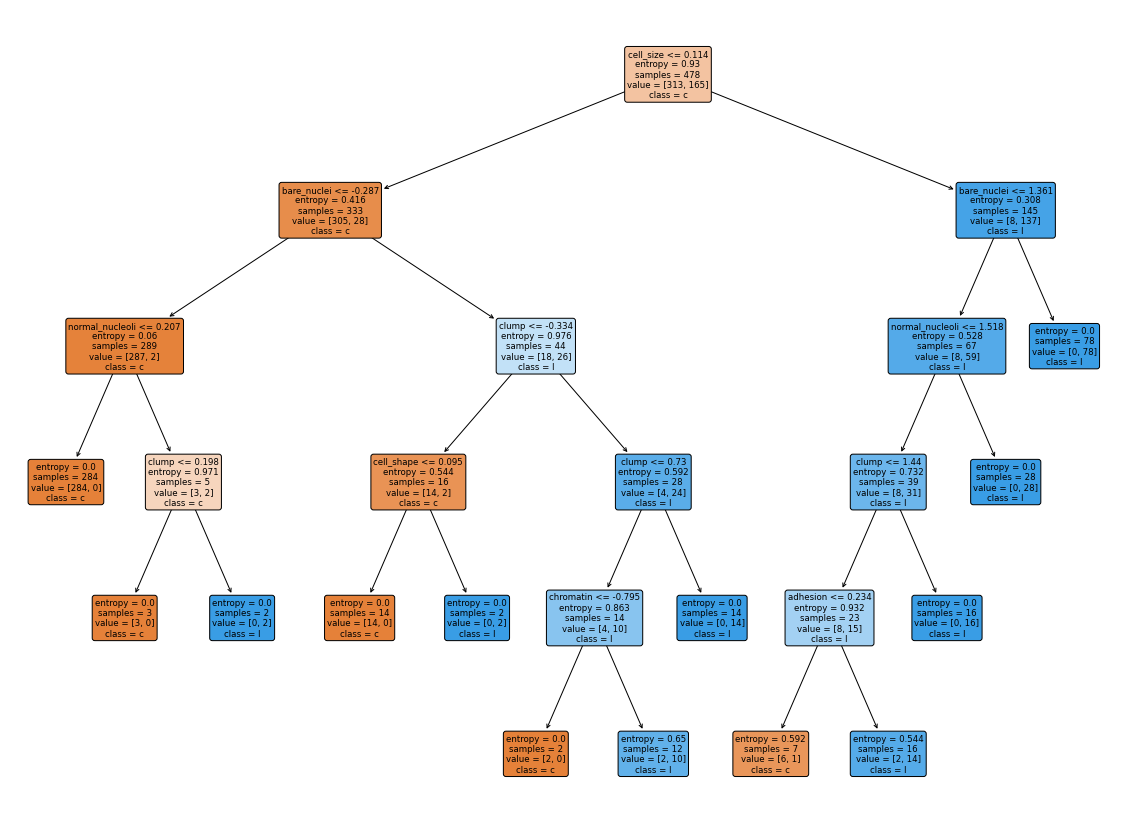

In [57]:
plt.figure(figsize=(20,15))
tree.plot_tree(tree_model,
               class_names="class",
               feature_names = feature_names,
               impurity=True, filled=True,
               rounded=True)
plt.show()

#군집

##k-Means

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

uci_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(uci_path, header=0)

print(df.head())
print()
print(df.info())
print()
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen 

In [60]:
X = df.iloc[:,:]
print(X[:5])
# print(X.head(5)) 랑 똑같음
print()
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)
print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [61]:
from sklearn import cluster
kmeans = cluster.KMeans(init="k-means++", n_clusters=5, n_init=10)
# init : k-means++ 모델 불러오기, n_init= 초기에 중심위치를 두는 횟수. 디폴트는 10이고 10개의 무작위 중심위치 목록 중 가장 좋은 값을 선택
kmeans.fit(X)
cluster_label = kmeans.labels_
print(cluster_label)
print()
df["Cluster"] = cluster_label
print(df.head())

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 3 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 3 1 1 0 0 1 1 0 0 3 1 0 0 1 3 1 1 0 3 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 3 3 0 0 0 0 0 3 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 4 0
 0 0 0 1 1 0 0 0 1 0 0 2 1 2 2 1 1 2 2 2 1 2 2 2 1 2 3 2 2 1 2 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 1 2 2 2 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 2 1
 2 1 1 2 1 1 1 1 1 1 1 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 4 2 2 2 2 2 1 2
 3 2 1 2 2 2 2 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     

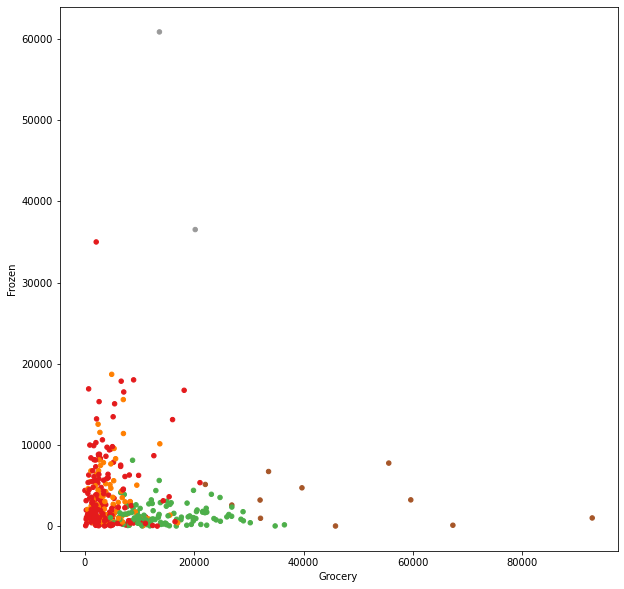

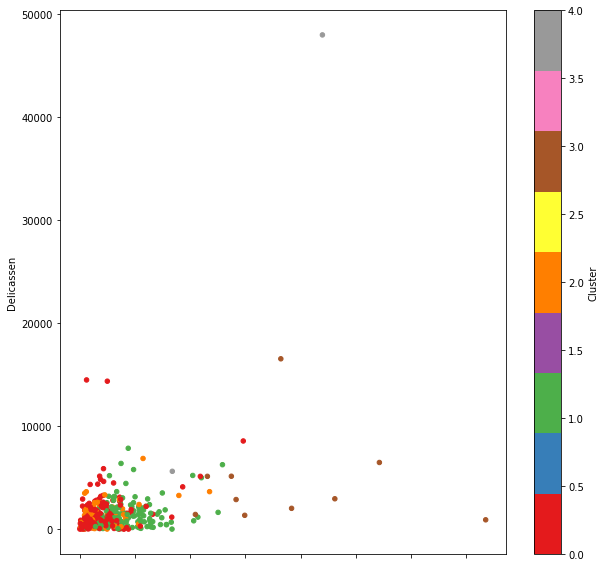

In [62]:
df.plot(kind="scatter", x="Grocery",y="Frozen", c="Cluster", cmap="Set1",colorbar=False, figsize=(10,10))
df.plot(kind="scatter", x="Milk",y="Delicassen", c="Cluster", cmap="Set1",colorbar=True, figsize=(10,10))